In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

solo texto con m y vuelta code con Y

crea celdad abajo con B o arriba con A, borrar celda con D+D

In [4]:
def ls(ruta = Path.cwd()):
    return  [arch.name for arch in Path(ruta).glob('invocations_per_function_md.anon.d[01][0-9].csv')]

In [9]:
path="/"
archs = ls() 
dfFinal= pd.DataFrame() 
archs

['invocations_per_function_md.anon.d01.csv',
 'invocations_per_function_md.anon.d02.csv',
 'invocations_per_function_md.anon.d03.csv',
 'invocations_per_function_md.anon.d04.csv',
 'invocations_per_function_md.anon.d05.csv',
 'invocations_per_function_md.anon.d06.csv',
 'invocations_per_function_md.anon.d07.csv',
 'invocations_per_function_md.anon.d08.csv',
 'invocations_per_function_md.anon.d09.csv',
 'invocations_per_function_md.anon.d10.csv',
 'invocations_per_function_md.anon.d11.csv',
 'invocations_per_function_md.anon.d12.csv',
 'invocations_per_function_md.anon.d13.csv',
 'invocations_per_function_md.anon.d14.csv']

In [27]:
indices= [] #[60 ,120,180,......1440] indices para hora
for n in range(60,1441):
    if((n%60) == 0):
        indices.append(n)
dia = 14
for arch in archs:
    df=pd.read_csv(arch) 
    dfInvoHora= pd.DataFrame()# nuevo dataframe par almacenar datos tratados por dia
    ini= 4
    fin= 0
    hora=0   
    for h in indices:
        fin = h+4
        
        #print (df.iloc[:,ini:fin].T.sum())
        dfAux = pd.DataFrame(df.iloc[:,ini:fin].T.sum(), columns=[ '2019-07-'+str(dia)+' '+str(hora) +':00:00'])
        dfInvoHora=dfInvoHora.join(dfAux, how='outer')
        ini =fin # solo es igual a fin por los rangos de indices y como se contabilizan
        hora+=1
        dfAux = pd.DataFrame()
        
    df=pd.DataFrame()    
    dfInvoHora= pd.DataFrame({'hora':dfInvoHora.sum().index, 'invocaciones':dfInvoHora.sum().values})
    
    if (dfFinal.empty):
        dfFinal=dfFinal.join(dfInvoHora,how='outer')
        
    else:
        dfFinal = pd.concat([dfFinal,dfInvoHora], ignore_index=True)
        
    dfInvoHora=pd.DataFrame()
    dia+=1
    
    print("cargando....... "+str((dia - 14))+" archivos") # para no desesperar mientras procesa los archivos
        

cargando....... 1 archivos
cargando....... 2 archivos
cargando....... 3 archivos
cargando....... 4 archivos
cargando....... 5 archivos
cargando....... 6 archivos
cargando....... 7 archivos
cargando....... 8 archivos
cargando....... 9 archivos
cargando....... 10 archivos
cargando....... 11 archivos
cargando....... 12 archivos
cargando....... 13 archivos
cargando....... 14 archivos


In [34]:
dfFinal[dfFinal['invocaciones'] ==0]


,hora,invocaciones


In [43]:
dfFinal.values

array([['2019-07-14 0:00:00', 32862030],
       ['2019-07-14 1:00:00', 32746554],
       ['2019-07-14 2:00:00', 34385569],
       ['2019-07-14 3:00:00', 33641370],
       ['2019-07-14 4:00:00', 34801510],
       ['2019-07-14 5:00:00', 35755033],
       ['2019-07-14 6:00:00', 36833099],
       ['2019-07-14 7:00:00', 37482678],
       ['2019-07-14 8:00:00', 38373149],
       ['2019-07-14 9:00:00', 38723405],
       ['2019-07-14 10:00:00', 38699044],
       ['2019-07-14 11:00:00', 39174320],
       ['2019-07-14 12:00:00', 39972583],
       ['2019-07-14 13:00:00', 42127795],
       ['2019-07-14 14:00:00', 42411965],
       ['2019-07-14 15:00:00', 42343865],
       ['2019-07-14 16:00:00', 41567253],
       ['2019-07-14 17:00:00', 41411550],
       ['2019-07-14 18:00:00', 41430908],
       ['2019-07-14 19:00:00', 40189503],
       ['2019-07-14 20:00:00', 38318973],
       ['2019-07-14 21:00:00', 37268987],
       ['2019-07-14 22:00:00', 35015334],
       ['2019-07-14 23:00:00', 34246902],
  

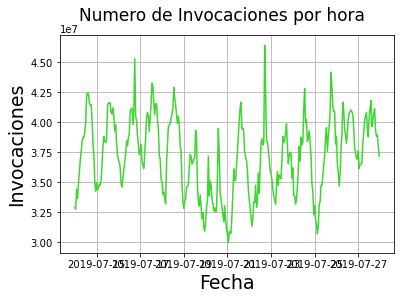

In [48]:
import datetime
import seaborn as sbn
import matplotlib.pyplot as mplt
import matplotlib.ticker as ticker
#dfFinal['hora']=dfFinal.hora\
#                .map(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
#dfFinal.set_index('hora', inplace=True)
mplt.suptitle('Numero de Invocaciones por hora', fontsize=17)
mplt.plot(dfFinal, color ='#3dd730', label='inv. por hora')
mplt.xlabel('Fecha',fontsize=19)
mplt.ylabel('Invocaciones',fontsize=19)
mplt.grid()



In [11]:
dfDia1 = pd.read_csv(archs[0])
tigress= dfDia1.groupby(['HashOwner','Trigger'])['Trigger'].count().unstack(-1).fillna(0)
tigress



Trigger,event,http,orchestration,others,queue,storage,timer
HashOwner,,,,,,,
0001edd756889b6f8ad48f9d7c03fe42d5bc3deabed9d77751d6fb55f6653ff7,0.0,3.0,0.0,0.0,0.0,0.0,0.0
0004c683cc83642ad363268eff6fe2ae7dc6552b75aa6fea605077d272aef343,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0008160de0dd2ee184e8562e158d6202bef33b9b842d5e72640bfe43b941a28e,0.0,0.0,0.0,0.0,0.0,0.0,2.0
00091948d80a5982d93f4e1a374bf0a02244c50ac85e10a3e05d8532d053695d,0.0,0.0,0.0,0.0,0.0,0.0,1.0
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb88fb71125f68f27b7,2.0,5.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc29417d196981d0bb1192a,4.0,1.0,0.0,0.0,1.0,0.0,0.0
ffdd84c92d911e7a1fba508f6b04a34baa408d1e55a97b928750a5cbb95d8baa,0.0,5.0,0.0,0.0,0.0,0.0,0.0
ffe4a34473b54e6902f910dd2fbc3c1be6a0d4d6974c128b5b6769f191b4ea90,1.0,9.0,0.0,0.0,0.0,0.0,0.0


In [1]:
tigress.sum().plot(kind = 'barh')

NameError: name 'tigress' is not defined

In [ ]:
dfDia1
#dfDia1.groupby(['HashOwner','HashApp','Trigger'])['Trigger'].count().unstack(-1).fillna(0)